In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm  # new

df = pd.read_csv('AirPassengers.csv').dropna()

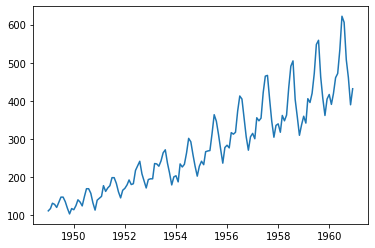

In [3]:
df['Month'] = pd.to_datetime(df['Month'])
plt.plot(df['Month'], df['#Passengers'])
plt.show()

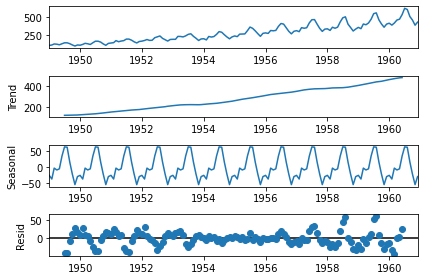

In [4]:
# Apply decompostion analysis to the time series
df  = df.set_index(['Month'])
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
decomposition.plot()
plt.show()

## New Dataset

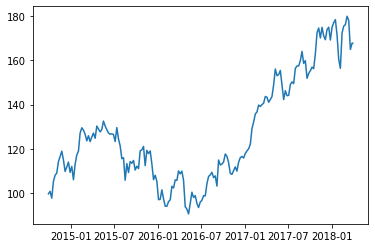

In [5]:
data = pd.read_csv('AAPL.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['Tick'] = range(0, len(data))
plt.plot(data['Date'], data['Close'])
plt.show()

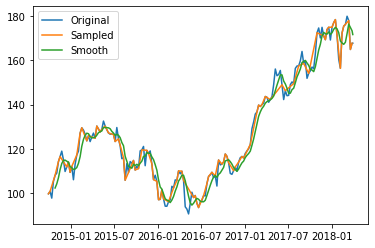

In [12]:
# Sample time series
data_one_tenth = data.sample(frac=0.5)
data_one_tenth = data_one_tenth.sort_values(by=['Tick'])
plt.plot(data['Date'], data['Close'], label='Original')
plt.plot(data_one_tenth['Date'], data_one_tenth['Close'], label='Sampled')

# Smooth the dataset

data['Rolling_Mean']  = data['Close'].rolling(window=5).mean()
## rolling means that it iterates and shifts by +1
plt.plot(data['Date'], data['Rolling_Mean'], label='Smooth')

# plot them all
plt.legend()
plt.show()

In [9]:
if len(data_one_tenth) == 1/2 * len(data):
    print('True')

True


### Look at this Website
[Quandl](http://www.quandl.com)

you can get api key

## New Dataset again

this time it's different. we have a pickle instead of a csv


In [14]:
aapl_table = pd.read_pickle('apple_quandl.pkl')

*Required: Register for account and confirm email address*

In [25]:
import settings
# to keep api key confidential

import numpy as np
import quandl
quandl.ApiConfig.api_key = settings.QUANDL_KEY

In [22]:
rate_return = 102.0/100 - 1
print(rate_return)

0.020000000000000018


In [26]:
# get quandl data
aapl_table = quandl.get('WIKI/AAPL')
aapl = aapl_table.loc['2017-3', ['Open', 'Close']]

#take log return
aapl['log_price'] = np.log(aapl.Close)
aapl['log_return'] = aapl['log_price'].diff()
print(aapl)

               Open   Close  log_price  log_return
Date                                              
2017-03-01  137.890  139.79   4.940141         NaN
2017-03-02  140.000  138.96   4.934186   -0.005955
2017-03-03  138.780  139.78   4.940070    0.005884
2017-03-06  139.365  139.34   4.936917   -0.003153
2017-03-07  139.060  139.52   4.938208    0.001291
2017-03-08  138.950  139.00   4.934474   -0.003734
2017-03-09  138.740  138.68   4.932169   -0.002305
2017-03-10  139.250  139.14   4.935481    0.003311
2017-03-13  138.850  139.20   4.935912    0.000431
2017-03-14  139.300  138.99   4.934402   -0.001510
2017-03-15  139.410  140.46   4.944923    0.010521
2017-03-16  140.720  140.69   4.946559    0.001636
2017-03-17  141.000  139.99   4.941571   -0.004988
2017-03-20  140.400  141.46   4.952017    0.010446
2017-03-21  142.110  139.84   4.940499   -0.011518
2017-03-22  139.845  141.42   4.951734    0.011235
2017-03-23  141.260  140.92   4.948192   -0.003542
2017-03-24  141.500  140.64   4

In [27]:
# From compund rate of return formula
aapl['log_price'] = np.log(aapl['Close'])
x = np.diff(aapl['log_price'])
print(aapl)
print(x.sum()*100)


               Open   Close  log_price  log_return
Date                                              
2017-03-01  137.890  139.79   4.940141         NaN
2017-03-02  140.000  138.96   4.934186   -0.005955
2017-03-03  138.780  139.78   4.940070    0.005884
2017-03-06  139.365  139.34   4.936917   -0.003153
2017-03-07  139.060  139.52   4.938208    0.001291
2017-03-08  138.950  139.00   4.934474   -0.003734
2017-03-09  138.740  138.68   4.932169   -0.002305
2017-03-10  139.250  139.14   4.935481    0.003311
2017-03-13  138.850  139.20   4.935912    0.000431
2017-03-14  139.300  138.99   4.934402   -0.001510
2017-03-15  139.410  140.46   4.944923    0.010521
2017-03-16  140.720  140.69   4.946559    0.001636
2017-03-17  141.000  139.99   4.941571   -0.004988
2017-03-20  140.400  141.46   4.952017    0.010446
2017-03-21  142.110  139.84   4.940499   -0.011518
2017-03-22  139.845  141.42   4.951734    0.011235
2017-03-23  141.260  140.92   4.948192   -0.003542
2017-03-24  141.500  140.64   4

In [31]:
# one month's return
10000 + (10000 * .0273)


10273.0

### $10,273